In [19]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

In [33]:
btc = yf.download('BTC-USD', start='2020-01-01', end='2022-12-31')

# Use Close price for forecasting
returns = btc['Close'].pct_change().dropna()

[*********************100%%**********************]  1 of 1 completed


Text(0.5, 1.0, 'BTC Returns')

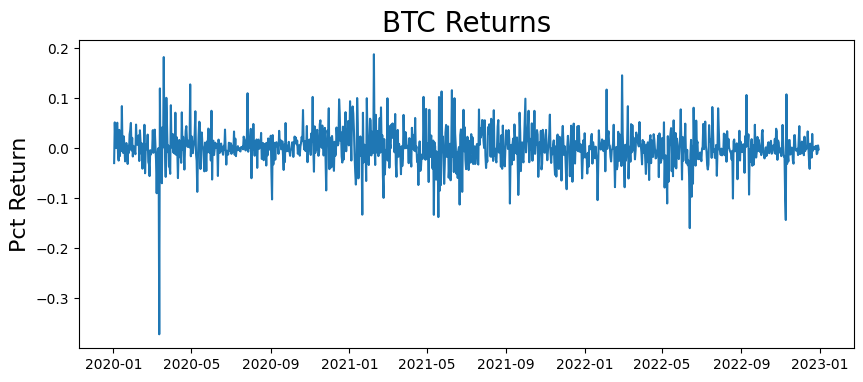

In [35]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('BTC Returns', fontsize=20)

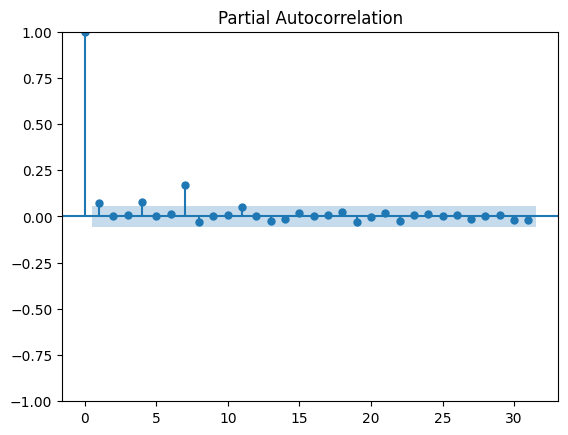

In [36]:
plot_pacf(returns**2)
plt.show()

In [37]:
model = arch_model(returns, p=3, q=3)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 5664912.360013166
Iteration:      2,   Func. Count:     25,   Neg. LLF: 1578528.1613993803
Iteration:      3,   Func. Count:     36,   Neg. LLF: 5127.5092889351945
Iteration:      4,   Func. Count:     49,   Neg. LLF: 1233136.6711358172
Iteration:      5,   Func. Count:     64,   Neg. LLF: 36690623.89870353
Iteration:      6,   Func. Count:     79,   Neg. LLF: 1496.349912544018
Iteration:      7,   Func. Count:     92,   Neg. LLF: 6302.175147425884
Iteration:      8,   Func. Count:    105,   Neg. LLF: -1510.1144307941563
Iteration:      9,   Func. Count:    116,   Neg. LLF: -2015.3965885189211
Iteration:     10,   Func. Count:    127,   Neg. LLF: -2052.551114912187
Iteration:     11,   Func. Count:    137,   Neg. LLF: -2051.55083643109
Iteration:     12,   Func. Count:    147,   Neg. LLF: -2026.33881152528
Iteration:     13,   Func. Count:    157,   Neg. LLF: -2057.384858899334
Iteration:     14,   Func. Count:    167,   Neg. LLF: -

e:\IPD_scripts\env\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00144. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2071.36
Distribution:                  Normal   AIC:                          -4126.72
Method:            Maximum Likelihood   BIC:                          -4086.74
                                        No. Observations:                 1094
Date:                Mon, Mar 11 2024   Df Residuals:                     1093
Time:                        13:54:54   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         2.0631e-03  1.032e-03      1.998  4.568e-02 [3.963e-05,4.087e-03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.4619e-04  6.991e-05      2.091  3.651e-02  [9.178e-06,2.832e-04]
alpha[1]       0.1670  9.532e-02      1.752  7.983e-02   [-1.985e-02,  0.354]
alpha[2]   8.1444e-05  5.458e-02  1.492e-03      0.999      [ -0.107,  0.107]
alpha[3]   1.4796e-06  2.244e-02  6.593e-05      1.000 [-4.398e-02,4.398e-02]
beta[1]        0.1437  6.858e-02      2.096  3.608e-02    [9.333e-03,  0.278]
beta[2]    5.2958e-13  6.147e-02  8.616e-12      1.000      [ -0.120,  0.120]
beta[3]        0.6035  4.414e-02     13.673  1.469e-42      [  0.517,  0.690]
=============================================================================

Covariance estimator: robust
"""

In [26]:
model = arch_model(returns, p=3, q=0)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 737843272.3144436
Iteration:      2,   Func. Count:     19,   Neg. LLF: 13040355.93926595
Iteration:      3,   Func. Count:     31,   Neg. LLF: 2976.0989588399807
Iteration:      4,   Func. Count:     41,   Neg. LLF: 1585471883.344618
Iteration:      5,   Func. Count:     53,   Neg. LLF: 773823017.9524788
Iteration:      6,   Func. Count:     65,   Neg. LLF: 99874.45805031074
Iteration:      7,   Func. Count:     76,   Neg. LLF: 7508.6684332248005
Iteration:      8,   Func. Count:     87,   Neg. LLF: 111391924.50382186
Iteration:      9,   Func. Count:     98,   Neg. LLF: -1962.7785042758403
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1962.7785016130147
            Iterations: 13
            Function evaluations: 98
            Gradient evaluations: 9


e:\IPD_scripts\env\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00144. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                1962.78
Distribution:                  Normal   AIC:                          -3915.56
Method:            Maximum Likelihood   BIC:                          -3890.57
                                        No. Observations:                 1094
Date:                Mon, Mar 11 2024   Df Residuals:                     1093
Time:                        13:50:28   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         2.6575e-03  1.319e-03      2.015  4.390e-02 [7.264e-05,5.242e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      7.2829e-04  1.265e-04      5.757  8.552e-09 [4.804e-04,9.762e-04]
alpha[1]       0.0672  4.389e-02      1.532      0.125  [-1.877e-02,  0.153]
alpha[2]       0.0666  5.549e-02      1.201      0.230  [-4.213e-02,  0.175]
alpha[3]       0.0666  3.451e-02      1.931  5.351e-02  [-1.006e-03,  0.134]
============================================================================

Covariance estimator: robust
"""

In [38]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

e:\IPD_scripts\env\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001597. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
e:\IPD_scripts\env\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001596. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
e:\IPD_scripts\env\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poo

In [39]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

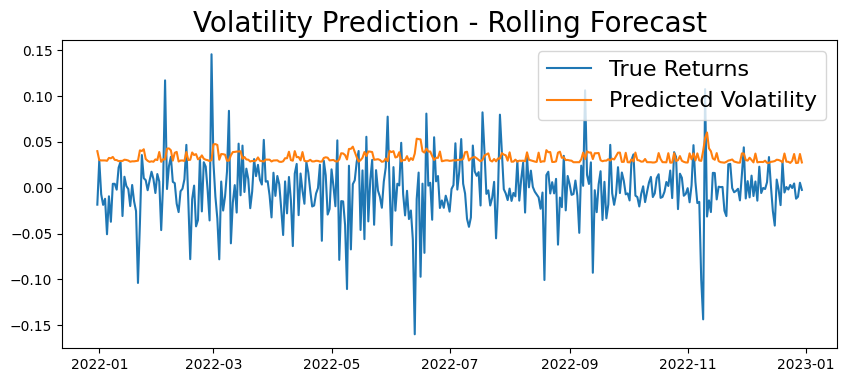

In [40]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

In [44]:
type(returns[-365:])

pandas.core.series.Series

In [45]:
type(rolling_predictions)

pandas.core.series.Series

In [52]:
from evaluate import evaluate_model


evaluate_model(list(returns[-365:]),list(rolling_predictions))

NameError: name 'np' is not defined